## Downloading dataset 

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/BBC News Summary')

Mounted at /content/drive/


In [3]:
!cp -r "/content/drive/MyDrive/BBC News Summary" /content/


## Importing necessary libraries

In [4]:
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import os

## Reading the data and storing in a dataframe

In [5]:
paths = os.listdir('/content/BBC News Summary/News Articles')
articles_path = '/content/BBC News Summary/News Articles/'
summaries_path = '/content/BBC News Summary/Summaries/'

articles = []
summaries = []
file_arr = []

for path in paths:
    files = os.listdir(articles_path + path)
    for file in files:
        article_file_path = articles_path + path + '/' + file
        summary_file_path = summaries_path + path + '/' + file
        try:
            with open (article_file_path,'r') as f:
                articles.append('.'.join([line.rstrip() for line in f.readlines()]))
            with open (summary_file_path,'r') as f:
                summaries.append('.'.join([line.rstrip() for line in f.readlines()]))
            file_arr.append(path + '/' + file)
        except:
            pass

In [6]:
pd.set_option('display.max_colwidth', 200)
df = pd.DataFrame({'path':file_arr,'article': articles,'summary':summaries})
df.head(2)

,path,article,summary
0,entertainment/188.txt,Celebrities get their skates on..Former England footballer Paul Gascoigne will join EastEnders' actress Scarlett Johnson on BBC One's Strictly Ice Dancing...The one-off Christmas special will also...,"Ice skating duo Jayne Torvill and Christopher Dean are to front a similar celebrity ice dance show for ITV, titled Stars on Thin Ice.The celebrities will have to practise a stipulated ice dance an..."
1,entertainment/053.txt,"Horror film heads US box office..A low-budget horror film produced by Evil Dead director Sam Raimi has topped the North American box office...Boogeyman, which focuses on a man who returns to his c...","This year, the top 12 films grossed around $91m (£48.3m), compared to 2004's Super Bowl weekend when the total box office was $73.4m (£38.9m).Boogeyman, which cost just $7m (£3.5m) to make, perfor..."


## Data Analysis and EDA

Adding word counts  to both article and the summary to get a better understanding of the text size

In [7]:
def count_words(text):
    return len(text.split())

df['wordcnt_article'] = df['article'].apply(count_words)
df['wordcnt_summary'] = df['summary'].apply(count_words)
df.head(2)


,path,article,summary,wordcnt_article,wordcnt_summary
0,entertainment/188.txt,Celebrities get their skates on..Former England footballer Paul Gascoigne will join EastEnders' actress Scarlett Johnson on BBC One's Strictly Ice Dancing...The one-off Christmas special will also...,"Ice skating duo Jayne Torvill and Christopher Dean are to front a similar celebrity ice dance show for ITV, titled Stars on Thin Ice.The celebrities will have to practise a stipulated ice dance an...",218,110
1,entertainment/053.txt,"Horror film heads US box office..A low-budget horror film produced by Evil Dead director Sam Raimi has topped the North American box office...Boogeyman, which focuses on a man who returns to his c...","This year, the top 12 films grossed around $91m (£48.3m), compared to 2004's Super Bowl weekend when the total box office was $73.4m (£38.9m).Boogeyman, which cost just $7m (£3.5m) to make, perfor...",260,110


In [8]:
df.describe()

,wordcnt_article,wordcnt_summary
count,2224.000000,2224.000000
mean,379.286871,165.151529
std,235.081995,108.678038
min,87.000000,38.000000
25%,242.000000,103.000000
50%,327.000000,142.000000
75%,465.250000,202.000000
max,4377.000000,2073.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   path             2224 non-null   object
 1   article          2224 non-null   object
 2   summary          2224 non-null   object
 3   wordcnt_article  2224 non-null   int64 
 4   wordcnt_summary  2224 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 87.0+ KB


> Word count distribution between article and summary

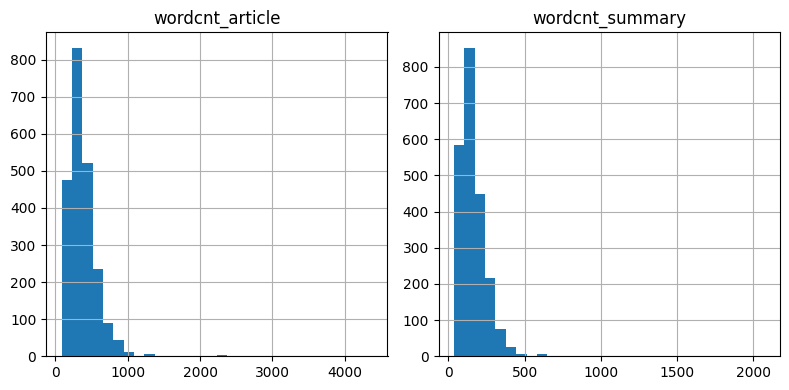

In [10]:
numerical_columns = df.select_dtypes(include=['int64'])

numerical_columns.hist(bins=30, figsize=(8, 4))
plt.tight_layout()
plt.show()

In [11]:
filtered_df = df[df['wordcnt_article'] < 400]
filtered_df.describe()

,wordcnt_article,wordcnt_summary
count,1429.000000,1429.000000
mean,265.725682,115.603219
std,71.062142,32.977902
min,87.000000,38.000000
25%,213.000000,91.000000
50%,263.000000,114.000000
75%,319.000000,139.000000
max,399.000000,211.000000


Looking at the distributions again

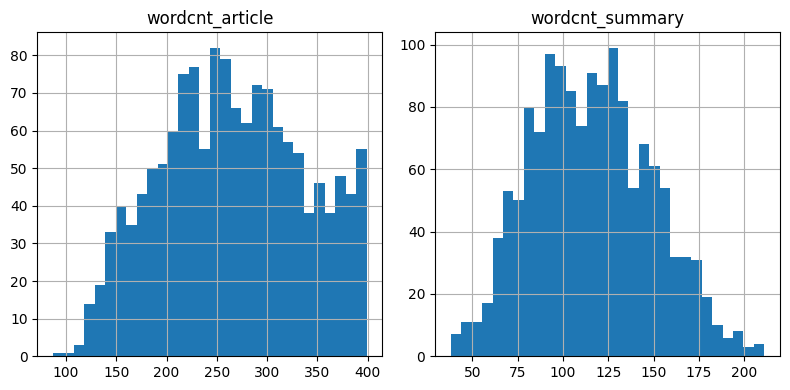

In [12]:
numerical_columns = filtered_df.select_dtypes(include=['int64'])
numerical_columns.hist(bins=30, figsize=(8, 4))
plt.tight_layout()
plt.show()

In [13]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1429 entries, 0 to 2223
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   path             1429 non-null   object
 1   article          1429 non-null   object
 2   summary          1429 non-null   object
 3   wordcnt_article  1429 non-null   int64 
 4   wordcnt_summary  1429 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 67.0+ KB


## Preprocessing

In [14]:

filtered_df = filtered_df.drop(['wordcnt_article', 'wordcnt_summary', 'path'], axis=1)

filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1429 entries, 0 to 2223
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  1429 non-null   object
 1   summary  1429 non-null   object
dtypes: object(2)
memory usage: 33.5+ KB


To optimize processing time, we will sample 30% of the data to see what we can achieve.

In [15]:

sample_size = int(0.3 * len(filtered_df))

sampled_df = filtered_df.sample(n=sample_size, random_state=42)
sampled_df.head(3)

,article,summary
149,"Halloween writer Debra Hill dies..Screenwriter and producer Debra Hill, best known for her work on the 70s horror classic Halloween, has died in Los Angeles aged 54...Hill, who had been suffering ...","Carpenter said that working with Hill was ""one of the greatest experiences of my life"".Hill also worked with Carpenter on Escape From New York and The Fog.She was regarded by many as a pioneering ..."
1911,"Ireland v USA (Sat)..Saturday 20 November..Lansdowne Road, Dublin..1300 GMT..The Irish coach knows a repeat of the record 83-3 victory over the States in 2000 is not on the agenda and expects a re...","G Murphy; S Horgan, B O'Driscoll (capt), K Maggs, T Bowe; D Humphreys, G Easterby; M Horan.The other changes see recalls for backs David Humphreys, Kevin Maggs and Guy Easterby with Eric Miller, M..."
748,"Civil servants in strike ballot..The UK's biggest civil service union is to ballot its 290,000 members on strikes in protest at government plans to extend their pension age to 65...The Public and ...","BBC correspondent Stephen Cape said the combined unions represented ""a formidable force"" which could embarrass the government in the run-up to the General Election.The UK's biggest civil service u..."


In [16]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 149 to 884
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  428 non-null    object
 1   summary  428 non-null    object
dtypes: object(2)
memory usage: 10.0+ KB


In [17]:
df=sampled_df


## Tokenize, split the data and set up the model for training and evaluation

In [18]:
! pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=190e17469dc22264e29af0c3b1c45736e39044fc3869836643980d88cc834962
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [19]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import TensorDataset, DataLoader
from transformers import BartTokenizer, BartForConditionalGeneration, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd
from rouge_score import rouge_scorer
from torch.cuda.amp import autocast, GradScaler
from torch.nn.utils import clip_grad_norm_


Tokenize and prepare data loaders for training/evaluation

In [20]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
max_length = 512
def tokenize_text(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True, padding='max_length', return_attention_mask=True)
    return inputs.to(device)

def tokenize_summary(text):
    inputs = tokenizer.encode(text, return_tensors="pt", max_length=280, truncation=True, padding='max_length', return_attention_mask=True)
    return inputs.to(device)


df['TokenizedText'] = df['article'].apply(tokenize_text)
df['TokenizedSummary'] = df['summary'].apply(tokenize_summary)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

X_train = torch.stack([seq.squeeze() for seq in train_df['TokenizedText']])
Y_train = torch.stack([seq.squeeze() for seq in train_df['TokenizedSummary']])
X_test = torch.stack([seq.squeeze() for seq in test_df['TokenizedText']])
Y_test = torch.stack([seq.squeeze() for seq in test_df['TokenizedSummary']])

train_dataset = TensorDataset(X_train, Y_train)
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataset = TensorDataset(X_test, Y_test)
test_dataloader = DataLoader(test_dataset, batch_size=4)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

In [27]:

model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

scaler = GradScaler()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the GPU
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=50, num_training_steps=len(train_dataloader) * 10)
early_stopping_rounds = 2
best_rouge_score = -1
current_round = 0

accumulation_steps = 20

def train(model, dataloader, optimizer, scheduler):
    model.train()
    total_loss = 0.0
    optimizer.zero_grad()

    for step, batch in enumerate(tqdm(dataloader, desc="Training")):
        inputs = batch[0].to(device)  # Move the input batch to the GPU
        attention_mask = (inputs != 0).float().to(device)  # Create attention mask
        targets = batch[1].to(device)  # Move the target batch to the GPU

        with autocast():
            outputs = model(input_ids=inputs, attention_mask=attention_mask, decoder_input_ids=targets, labels=targets)
            loss = outputs.loss


        loss = loss / accumulation_steps
        scaler.scale(loss).backward()

        if (step + 1) % accumulation_steps == 0:

            clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        total_loss += loss.item()

    return total_loss / len(dataloader)

def calculate_rouge1_precision(logits, targets):
    scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
    rouge1_precision = 0.0
    num_samples = len(logits)

    for i in range(num_samples):
        predicted_ids = logits[i].cpu().numpy()
        target_ids = targets[i].cpu().numpy()


        predicted_text = tokenizer.decode(predicted_ids, skip_special_tokens=True)
        target_text = tokenizer.decode(target_ids, skip_special_tokens=True)


        scores = scorer.score(predicted_text, target_text)
        rouge1_precision += scores['rouge1'].precision

    return rouge1_precision / num_samples


for epoch in range(2):
    train_loss = train(model, train_dataloader, optimizer, scheduler)
    print(f"Epoch {epoch+1}/{2}, Train Loss: {train_loss:.4f}")




/tmp/ipython-input-2973118458.py:3: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Training:   0%|          | 0/86 [00:00<?, ?it/s]/tmp/ipython-input-2973118458.py:25: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Training: 100%|██████████| 86/86 [00:12<00:00,  7.04it/s]


Epoch 1/2, Train Loss: 0.6976


Training: 100%|██████████| 86/86 [00:12<00:00,  6.95it/s]

Epoch 2/2, Train Loss: 0.6991


Evaluating on the test data

In [28]:
def evaluate(model, dataloader):
    model.eval()

    test_articles = []
    actual_summaries = []
    predicted_summaries = []
    rouge1_precision_scores = []

    scorer = rouge_scorer.RougeScorer(['rouge1'])

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating Test"):
            inputs = batch[0].to(device)
            attention_mask = (inputs != 0).float().to(device)
            targets = batch[1].to(device)
            outputs = model.generate(input_ids=inputs, attention_mask=attention_mask, max_length=150, num_beams=17, length_penalty=2.0, early_stopping=False)
            for output, target, input_text in zip(outputs, targets, inputs):
                output_text = tokenizer.decode(output, skip_special_tokens=True)
                target_text = tokenizer.decode(target, skip_special_tokens=True)
                rouge_scores = scorer.score(output_text, target_text)
                rouge1_precision_scores.append(rouge_scores['rouge1'].precision)
                test_articles.append(tokenizer.decode(input_text, skip_special_tokens=True))
                actual_summaries.append(target_text)
                predicted_summaries.append(output_text)

    return test_articles, actual_summaries, predicted_summaries, rouge1_precision_scores

test_articles, actual_summaries, predicted_summaries, rouge1_precision_scores = evaluate(model, test_dataloader)

data = {
    'Article': test_articles,
    'Actual Summary': actual_summaries,
    'Predicted Summary': predicted_summaries,
    'ROUGE-1 Precision': rouge1_precision_scores,
}
results_df = pd.DataFrame(data)
pd.set_option('display.max_colwidth', None)
print(results_df['ROUGE-1 Precision'].mean())
results_df.head(5)

Evaluating Test: 100%|██████████| 22/22 [02:57<00:00,  8.06s/it]

0.606724823519605


,Article,Actual Summary,Predicted Summary,ROUGE-1 Precision
0,"summarize: Lib Dems demand new inquiry..A judge should look into the David Blunkett controversy as key questions remain unanswered, the Lib Dems say...Sir Alan Budd's inquiry linked the ex-home secretary to the speeding up of a visa claim by his ex-lover's nanny. But he could not say whether Mr Blunkett had treated the nanny as a special case or had used her as an example of immigration problems. Lib Dem spokesman Mark Oaten said the number of officials who had forgotten what happened was worrying. He told BBC News: ""I'm extremely concerned that 20 individuals appear to have forgotten what happened or more suspiciously are not prepared to say what happened. ""That must be bad for government, it must be bad for public confidence in the system.""..Mr Oaten said people would be mystified why Sir Alan's inquiry failed to uncover why processing of the visa application was speeded up. He said: ""There is a strong case for a judge-led judicial review of this because, of course, next time it happens it may not be about a nanny and their visa. It may be about something even more important than that. ""So we do need to understand what took place and who was involved."" The Tories criticised the Lib Dem stance, saying Mr Oaten had initially said he accepted Mr Blunkett's word unless further evidence emerged. But Lib Dem officials say Mr Oaten was speaking when an inquiry was under way and was avoiding rushing to judgement.","But Lib Dem officials say Mr Oaten was speaking when an inquiry was under way and was avoiding rushing to judgement.Lib Dem spokesman Mark Oaten said the number of officials who had forgotten what happened was worrying.Mr Oaten said people would be mystified why Sir Alan's inquiry failed to uncover why processing of the visa application was speeded up.The Tories criticised the Lib Dem stance, saying Mr Oaten had initially said he accepted Mr Blunkett's word unless further evidence emerged.He said: ""There is a strong case for a judge-led judicial review of this because, of course, next time it happens it may not be about a nanny and their visa.","summarize: Lib Dem demand new inquiry..A judge should look into the David Blunkett controversy as key questions remain unanswered, the Lib Dems say...Sir Alan Budd's inquiry linked the ex-home secretary to the speeding up of a visa claim by his ex-lover's nanny. But he could not say whether the number of officials who had forgotten what happened was worrying. He told BBC News: ""I'm extremely concerned that 20 individuals appear to have forgotten what happens or more suspiciously are not prepared to say what happened. ""That must be bad for government, it must be better for public confidence in the system.""..Mr Oaten said people would be mystified why Sir Alan's inquiry failed to uncover",0.444444
1,"summarize: Nissan names successor to Ghosn..Nissan has named a lifetime employee to run its operations after Carlos Ghosn, its highly successful boss, takes charge at Renault...As chief operating officer, Toshiyuki Shiga will run Nissan on a daily basis, although Mr Ghosn, who masterminded its recovery, will remain chief executive. Mr Ghosn is to become chairman and chief executive of Renault, which owns 44% of the Japanese carmaker, in April. Mr Ghosn transformed Nissan into a fast-growing and profitable business...Mr Shiga will nominally serve as Mr Ghosn's deputy. However, he will be Nissan's most senior Japan-based executive and will be in charge of the firm's global sales and marketing...He is currently in charge of Nissan's operations across Asia and Australasia and is credited with significantly improving its sales in China. He will inherit a strong legacy from Mr Ghosn, who has overseen a dramatic turnaround in Nissan's fortunes in the past five years. Dubbed 'le cost killer' for pushing through huge cost cuts in previous jobs, Mr Ghosn reduced Nissan's overheads by 20% and trimmed its workforce by about 20

In [23]:
pd.set_option('display.max_colwidth', 100)

results_df.head(20)

,Article,Actual Summary,Predicted Summary,ROUGE-1 Precision
0,summarize: Lib Dems demand new inquiry..A judge should look into the David Blunkett controversy ...,But Lib Dem officials say Mr Oaten was speaking when an inquiry was under way and was avoiding r...,summarize: Lib Dem demand new inquiry..A judge should look into the David Blunkett controversy a...,0.444444
1,summarize: Nissan names successor to Ghosn..Nissan has named a lifetime employee to run its oper...,Mr Ghosn transformed Nissan into a fast-growing and profitable business.In his new job as Renaul...,summarize: Nissan names successor to Ghosn..Nissan has named a lifetime employee to run its oper...,0.529032
2,"summarize: Israeli club look to Africa..Four African players, including Zimbabwe goalkeeper Ener...","Four African players, including Zimbabwe goalkeeper Energy Murambadoro, are all ready to play fo...","summarize: Israeli club look to Africa..Four African players, including Zimbabwe goalkeeper Ener...",0.854545
3,summarize: Rock band U2 break ticket record..U2 have smashed Irish box office records with ticke...,"""We could have sold a million tickets.""U2 have smashed Irish box office records with ticket sale...",summarize: Rock band U2 break ticket record..U2 have smashed Irish box office records with ticke...,0.477273
4,summarize: Oil prices fall back from highs..Oil prices retreated from four-month highs in early ...,Oil prices retreated from four-month highs in early trading on Tuesday after producers' cartel O...,summarize: Oil prices fall back from highs..Oil prices fall from four-month highs in early tradi...,0.872340
5,summarize: Wilkinson to miss Ireland match..England will have to take on Ireland in the Six Nati...,England will have to take on Ireland in the Six Nations without captain and goal-kicker Jonny Wi...,summarize: Wilkinson to miss Ireland match..England will have to take on Ireland in the Six Nati...,0.473958
6,summarize: English clubs make Euro history..All four of England's Champions League representativ...,"The favourites are Chelsea and Barcelona, and Real Madrid, the two Milan sides, Juventus and Bay...","The favourites are Chelsea and Barcelona, and Real Madrid, the two Milan sides, Juventus and Bay...",0.586957
7,summarize: US trade gap ballooned in October..The US trade deficit widened by more than expected...,"The US trade deficit widened by more than expected in October, hitting record levels after highe...",summarize: US trade gap ballooned in October..The US trade deficit widened by more than expected...,0.752294
8,"summarize: Tulu to appear at Caledonian run..Two-time Olympic 10,000 metres champion Derartu Tul...","Two-time Olympic 10,000 metres champion Derartu Tulu has confirmed she will take part in the BUP...","summarize: Tulu to appear at Caledonian run..Two-time Olympic 10,000 metres champion Derartu Tul...",0.768116
9,summarize: Local net TV takes off in Austria..An Austrian village is testing technology that cou...,The Engerwitzdorf scheme is an outgrowth of Telekom Austria's online TV channel Aon which lets p...,summarize: Local net TV takes off in Austria..An Austrian village is testing technology that cou...,0.315271


In [24]:
import torch
import os

model.to('cpu')

save_path = '/content/fine_tuned_bart_model.pth'
torch.save(model.state_dict(), save_path)

print("Model saved at:", save_path)

Model saved at: /content/fine_tuned_bart_model.pth
